In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def vbm_path_generator(n_paths, n_steps, T, mu, sigma, X_0, theta, k):

    # Create
    Z = np.random.normal(0.0, 1.0, [n_paths, n_steps])
    X = np.zeros([n_paths, n_steps + 1])
    time = np.zeros(n_steps + 1)

    X[:, 0] = X_0
    dt = T / float(n_steps)

    for k in range(0, n_steps):
        X[:, k+1] = X[:, k]*(math.e ** (-k* dt))  + theta * (1 - math.e ** (-k*T)) * dt / T + sigma * np.sqrt(dt) * Z[:, k] * (math.e ** (dt-T))
        time[k+1] = time[k] + dt

    paths = {'X': X, 'time': time}

    return paths

In [ ]:
def main_calculation():
    n_paths = 25
    n_steps = 500
    T = 1
    mu = 10
    sigma = 40
    X_0 = 2
    theta = 1
    k = 0.2
    paths = vbm_path_generator(n_paths, n_steps, T, mu, sigma, X_0, theta, k)
    ABM = paths['X']
    time_grid = paths['time']

    plt.figure(figsize = (10, 6))
    plt.plot(time_grid, np.transpose(ABM))
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('X(t)')

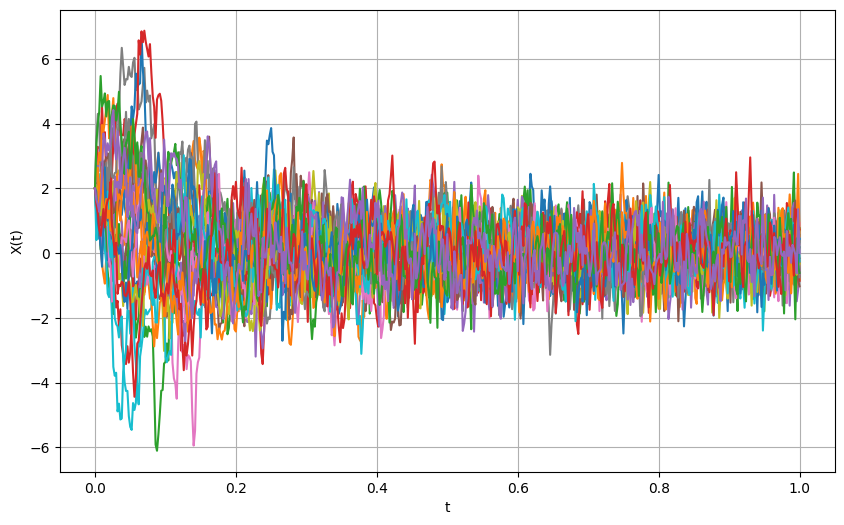

In [ ]:
main_calculation()